mask unique values: [  0 255]
image type: <class 'PIL.Image.Image'>, mask type: <class 'numpy.ma.core.MaskedArray'>
image shape: (512, 512), mask shape: (512, 512)


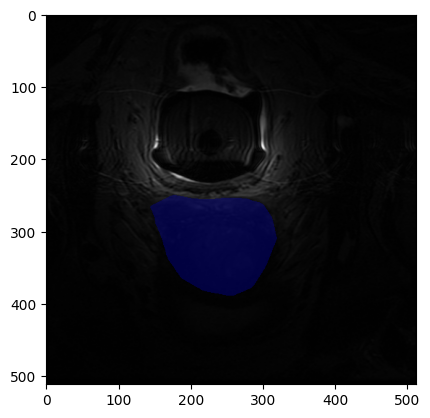

In [1]:
from medsegbench import Promise12MSBench
import matplotlib.pyplot as plt
import numpy as np

train_dataset = Promise12MSBench(split="train", download=True, root="../data")
image, mask = train_dataset[0]
print(f"mask unique values: {np.unique(mask)}")
mask = np.ma.masked_where(mask == 0, mask)
print(f"image type: {type(image)}, mask type: {type(mask)}")
print(f"image shape: {image.size}, mask shape: {mask.shape}")
plt.imshow(image, cmap="gray")
plt.imshow(mask, cmap="jet", alpha=0.5)

In [3]:
from medsegbench import Promise12MSBench
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset
from ipywidgets import IntSlider, Checkbox, interact

train_dataset = Promise12MSBench(split="train", download=True, root="../data")
image, mask = train_dataset[0]
print(f"image type: {type(image)}, mask type: {type(mask)}")
print(f"image shape: {image.size}, mask shape: {mask.shape}")

def npz_file_viewer(dataset: Dataset):
  def show(index: int, show_mask: bool):
    plt.figure(figsize=(10, 10))
    plt.title(f"Image at index {index}")
    image = dataset[index][0]
    plt.imshow(image, cmap="gray")
    if show_mask: # Combined: display the image with the mask overlayed.
      # Mask out zeros so only non-zero regions (i.e. where mask is necessary) are shown.
      mask = dataset[index][1]
      mask = np.ma.masked_where(mask == 0, mask)
      plt.imshow(mask, cmap="jet", alpha=0.5)
      plt.title(f"Combined view at index {index}")

  index_slider = IntSlider(value=0, min=0, max=len(train_dataset)-1, step=1, 
                           continuous_update=False)
  show_mask_checkbox = Checkbox(value=True, description="Show Mask")

  return interact(show, index=index_slider, show_mask=show_mask_checkbox)

npz_file_viewer(train_dataset)

image type: <class 'PIL.Image.Image'>, mask type: <class 'numpy.ndarray'>
image shape: (512, 512), mask shape: (512, 512)


interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=1030), Checkbox(val…

<function __main__.npz_file_viewer.<locals>.show(index: int, show_mask: bool)>